<div align="center">
    <img src='../xepimage.png' style='height:100px;'>
</div>


<center><h1 style='font-size:25px'>Feature engenieering</h1></center>

---

**Autor: Guillermo J. Bergues**

Feature engineering for the Xepelin project.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler

In [2]:
mark = dict(marker='+', markerfacecolor='g', markersize=15,
                  linestyle='none', markeredgecolor='b')

In [3]:
# Read data set
df = pd.read_csv ('../Data/data_set.csv')

# Prepare data set for Model

In [4]:
# Drop null values
# We need to process the PAID transactions.
df.dropna(inplace = True)

I cannot add the transactions in process and failed to the model. 

* They have null values in date column. 
* If it is failed, the transaction didn't add value.
* If it is in process, maybe then will failed.

In [5]:
# Drop columns
df.drop(['invoiceId', 'status'], axis=1, inplace=True)

* Status doesn't add information to the model. I can't do some encoding because they have only one value after taking away null values.
* id does not go in.

# Time

In [6]:
def time_fe(df):
    # Convert to string
    df.paidAt = df.paidAt.astype("str")
    # Arrange date column
    df["paidAt"] = df["paidAt"].astype(str).str[:-9]
    # To date format.
    df['paidAt'] = pd.to_datetime(df['paidAt'], format='%Y-%m-%d')
    df['paidAt'] = df['paidAt'] - min(df['paidAt'])
    df['paidAt'] = df['paidAt'].dt.days
    df.rename(columns={'paidAt': 'days'}, inplace=True)
    return df 

In [7]:
# Call time function
df = time_fe(df)

In [8]:
df.head()

,PayerId,ReceiverId,days,amount,amountfinancedByXepelin
0,53,10,196,1490.46,0.00
1,93,11,42,6418.28,624.48
2,122,12,10,27979.20,10520.15
3,85,13,35,183070.77,79421.63
4,87,14,165,20532.00,20532.00


In [9]:
# Change data type in two columns
change_type = ['PayerId', 'ReceiverId']
df[change_type] = df[change_type].astype("int")

In [10]:
# Sort values by days amount
df = df.sort_values(by=["days"]) 

In [11]:
df.head()

,PayerId,ReceiverId,days,amount,amountfinancedByXepelin
9,151,19,0,1490.46,0.00
8,126,18,0,920.26,0.00
15,114,37,7,4035.26,0.00
2,122,12,10,27979.20,10520.15
12,55,34,22,1477.46,0.00


In [12]:
# Save new data set
df.to_csv('../Data/ds_basic.csv', index=False)

# DS without ouliers

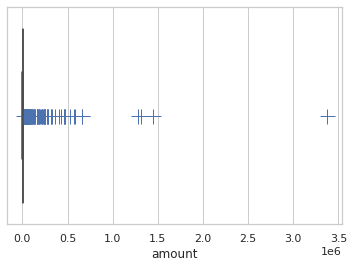

In [13]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df["amount"], flierprops=mark)

In [14]:
# Remove outlier
df2 = df.copy()
df2 = df2[df2['amount'] < 3000000]

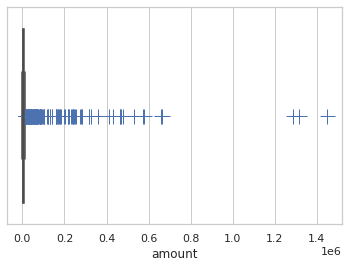

In [15]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df2["amount"], flierprops=mark)

In [16]:
# Sort by date
df2 = df2.sort_values(by=["days"]) 

In [17]:
df2.to_csv('../Data/ds_outliers.csv', index=False)

# Scale numerical columns

In [18]:
df3 = df.copy()

In [19]:
# Select columns to scale.
num_df = df3[['amount', 'amountfinancedByXepelin']]

In [20]:
# Use standard Scaler for scale numerical columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [21]:
scaled_num_df = pd.DataFrame(data = scaled_data, 
                             columns = num_df.columns, 
                             index = df3.index)
scaled_num_df.head()

,amount,amountfinancedByXepelin
9,-0.189905,-0.140745
8,-0.193606,-0.140745
15,-0.173390,-0.140745
2,-0.017997,-0.060917
12,-0.189990,-0.140745


In [22]:
# Drop old numerical and not scaled Data
df3.drop(columns = scaled_num_df.columns, inplace = True)

In [23]:
# Create new X_train with the scaled data.
df3 = pd.concat([scaled_num_df, df3], axis = 1)

In [24]:
df3.head()

,amount,amountfinancedByXepelin,PayerId,ReceiverId,days
9,-0.189905,-0.140745,151,19,0
8,-0.193606,-0.140745,126,18,0
15,-0.173390,-0.140745,114,37,7
2,-0.017997,-0.060917,122,12,10
12,-0.189990,-0.140745,55,34,22


In [25]:
df3.to_csv('../Data/ds_scale.csv', index=False)